In [1]:
import pandas as pd
import sqlite3

# Connect to your SQLite database
conn = sqlite3.connect('churn.db')

# Load the data
df = pd.read_sql_query("SELECT * FROM customers;", conn)
conn.close()

In [2]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [3]:
categorical_cols = df.select_dtypes(include='object').columns.tolist() #collect all the columns that are categorical
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist() #collect the columns that are numerical

print("Categorical:", categorical_cols)
print("Numerical:", numerical_cols)

Categorical: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


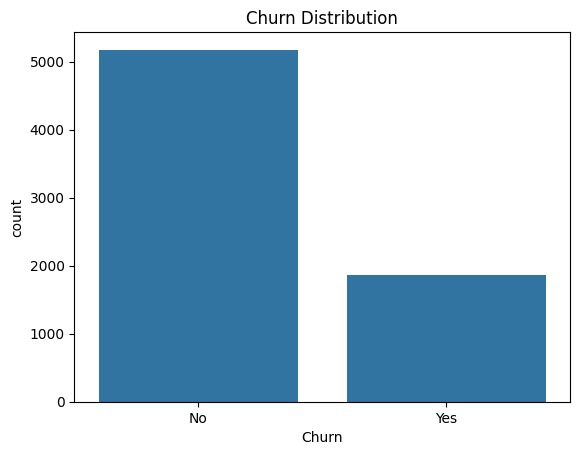

In [4]:
#visual inspection
import seaborn as sns
import matplotlib.pyplot as plt

# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

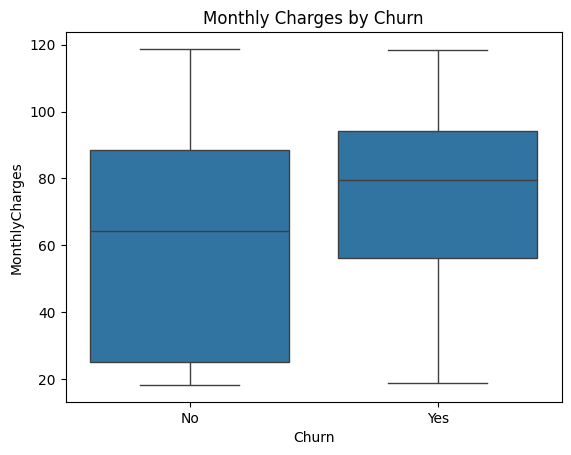

In [5]:
# Monthly Charges by Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()

### Day 6 Summary

- Loaded data from SQLite database
- Identified categorical and numerical columns
- Explored target variable (`Churn`) and relationships with features

In [6]:
#columns with yes/no values
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Convert Yes/No to 1/0
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Convert gender to binary
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Map 'Churn' if not already done
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}) if df['Churn'].dtype == 'object' else df['Churn']


In [7]:
# Identify remaining object columns (multiclass)
multiclass_cols = df.select_dtypes(include='object').columns.tolist()
print("To One-Hot Encode:", multiclass_cols)

# One-hot encode
df = pd.get_dummies(df, columns=multiclass_cols, drop_first=True)

To One-Hot Encode: ['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [8]:
df['EstimatedTotalSpend'] = df['MonthlyCharges'] * df['tenure'] #lifetime spend

In [9]:
print("Shape:", df.shape)
df.head()

Shape: (7043, 7074)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,EstimatedTotalSpend
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,True,False,29.85
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,True,False,False,False,True,1936.30
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,True,107.70
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,False,False,False,False,True,False,False,False,False,1903.50
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,True,False,141.40


In [10]:
df.to_csv('data/ml_ready_churn.csv', index=False) #dataset ready for ML

### Day 7 Summary

- Label-encoded binary columns (Yes/No, Male/Female)
- One-hot encoded multiclass categorical variables
- Engineered a new feature: `EstimatedTotalSpend`
- Saved clean dataset for ML training